# Numerical integration and functions

## Trapezoid rule

In this lecture, we cover some examples of the use of numerical integration and functions.  From the [solutions to tutorial 1](https://colab.research.google.com/github/mjksill/CP213-online/blob/master/tutorials/tutorialS1_1-soln.ipynb), we have a code that can use the trapezoid rule to numerically integrate the function $x^3$ from 0 to 1.



In [ ]:
import numpy as np

I_exact = 0.25

N = 8  # Now we are using 8 trapezoids
x_data = np.linspace(0.0, 1.0, N+1)  # N trapezoids leads to N+1 points
f_data = [x**3 for x in x_data]

I = 0.0
for k in range(N):
    I += 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])


print(f'trapezoid rule : {I}, exact: {I_exact}')
print(f'error = {(I-I_exact)/I_exact*100.0}%')



trapezoid rule : 0.25390625, exact: 0.25
error = 1.5625%


With a little bit of effort, we can create a function that can integrate a general function between any given limits:

In [ ]:
import numpy as np


N = 1000  # Now we are using 8 trapezoids

def w(x):
  return x**2

def y(x):
  return np.sin(x)


def integrate(f, a, b, N):

  x_data = np.linspace(a, b, N+1)  # N trapezoids leads to N+1 points
  f_data = [f(x) for x in x_data]

  I = 0.0
  for k in range(N):
    I = I + 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])
  return I

ans = integrate(y, 2, 5, 1000)
print(ans)

-0.6998084971535246


## Heat capacity of gases

Now we look to apply the numerical integration function we just developed to calculate the enthalpy change in a gas mixture.  Our starting point will be the code we developed in a [previous lecture](https://colab.research.google.com/github/mjksill/CP213-online/blob/master/notebooks/2023-09-22.ipynb) to calculate the heat capacity of a gas mixture.  It is given below:

40.50056106
34.28436779784


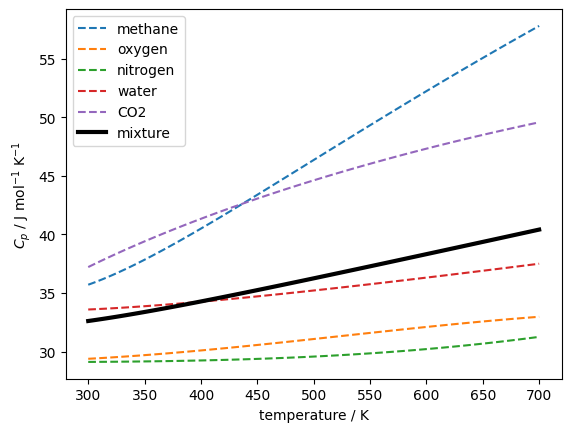

In [ ]:
import numpy as np
import pylab as plt

x = {}
x['methane'] = 0.2
x['oxygen'] = 0.21*0.4
x['nitrogen'] = 0.79*0.4
x['water'] = 0.3
x['CO2'] = 0.1

data = {'methane': 16, 'oxygen': 32, 'nitrogen': 28, 'water': 18}

p = {}
p['methane'] = [-0.703,108.477,-42.522,5.86279,0.67857,-76.844,158.716,-74.873]
p['oxygen'] = [31.3223,-20.235,57.8664,-36.506,-0.0074,-8.9035,246.795,0]
p['nitrogen'] = [28.98641,1.853978,-9.647459,16.63537,0.000117,-8.671914,226.4168,0]
p['CO2'] = [24.99735,55.18696,-33.69137,7.948387,-0.136638,-403.6075,228.2431,-393.5224]
p['water'] = [30.092,6.832514,6.793435,-2.53448,0.082139,-250.881,223.3967,-241.8264]

def get_Cp(T, param):
  t = T/1000
  A, B, C, D, E, F, G, H = param
  Cp = A + B*t + C*t**2 + D*t**3 + E/t**2
  return Cp

Cp = get_Cp(400, p['methane'])
print(Cp)

T = 400
Cpmix = 0.0
for mol in x.keys():
  Cp = get_Cp(T, p[mol])
  Cpmix += Cp * x[mol]
print(Cpmix)

def get_Cpmix(T, x):
  Cpmix = 0.0
  for mol in x.keys():
    Cp = get_Cp(T, p[mol])
    Cpmix += Cp * x[mol]
  return Cpmix

T_list = np.linspace(300, 700, 100)
for A in x.keys():
  y_list = [get_Cp(T, p[A]) for T in T_list]
  plt.plot(T_list, y_list, label=A, ls='dashed')

y_list = [get_Cpmix(T, x) for T in T_list]
plt.plot(T_list, y_list, label='mixture', lw=3, color='black')

plt.legend()
plt.xlabel('temperature / K')
plt.ylabel('$C_p$ / J mol$^{-1}$ K$^{-1}$')
plt.show()


We note that the enthalpy change of a material is given by the integral of its heat capacity with temperature:
$$
\begin{align*}
H(T) - H(T_0)
&=
\int_{T_0}^{T} dT'\,C_p(T')
.
\end{align*}
$$

We can use this relation to combine our function for the heat capacity of a pure substance with the numerical integration algorithm to calculate the enthalpy change of a gas.

Based on this, we can also determine the enthalpy change of a gas mixture.

In [ ]:
import numpy as np
import pylab as plt



x = {}
x['methane'] = 0.2
x['oxygen'] = 0.21*0.4
x['nitrogen'] = 0.79*0.4
x['water'] = 0.3
x['CO2'] = 0.1

data = {'methane': 16, 'oxygen': 32, 'nitrogen': 28, 'water': 18}

p = {}
p['methane'] = [-0.703,108.477,-42.522,5.86279,0.67857,-76.844,158.716,-74.873]
p['oxygen'] = [31.3223,-20.235,57.8664,-36.506,-0.0074,-8.9035,246.795,0]
p['nitrogen'] = [28.98641,1.853978,-9.647459,16.63537,0.000117,-8.671914,226.4168,0]
p['CO2'] = [24.99735,55.18696,-33.69137,7.948387,-0.136638,-403.6075,228.2431,-393.5224]
p['water'] = [30.092,6.832514,6.793435,-2.53448,0.082139,-250.881,223.3967,-241.8264]

def get_Cp(T, param):
  t = T/1000
  A, B, C, D, E, F, G, H = param
  Cp = A + B*t + C*t**2 + D*t**3 + E/t**2
  return Cp

Cp = get_Cp(400, p['methane'])
print(Cp)

T = 400
Cpmix = 0.0
for mol in x.keys():
  Cp = get_Cp(T, p[mol])
  Cpmix += Cp * x[mol]
print(Cpmix)

def get_Cpmix(T, x):
  Cpmix = 0.0
  for mol in x.keys():
    Cp = get_Cp(T, p[mol])
    Cpmix += Cp * x[mol]
  return Cpmix

def get_delta_enthalpy(p, Tinitial, Tfinal, N):

  x_data = np.linspace(Tinitial, Tfinal, N+1)  # N trapezoids leads to N+1 points
  f_data = [get_Cp(x, p) for x in x_data]

  I = 0.0
  for k in range(N):
    I = I + 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])
  return I

for N in range(50, 1000, 100):
  DH = get_delta_enthalpy(p['methane'], 300, 700, N)
  print(N, DH)

T = 500
Hmix = 0
for A in x.keys():
  Hmix += x[A] * get_delta_enthalpy(p[A], 300, T, 1000)
print(Hmix)

for A in x.values():
  print(A)

40.50056106
34.28436779784
50 18567.875137577303
150 18567.783557408082
250 18567.77622843093
350 18567.77420915618
450 18567.77337817052
550 18567.772957525092
650 18567.77271559118
750 18567.772563799863
850 18567.772462355406
950 18567.772391224855
6866.418165122766
0.2
0.084
0.31600000000000006
0.3
0.1


Now that we have developed a function that can calculate the enthalpy change of a gas mixture, we can use this to perform energy balances.  First, let's remember how to numerically solve an algebraic equation using the `fsolve` function from the `scipy.optimize` Python library.  For a more detailed discussion, see the appropriate [notebook on Myplace](https://colab.research.google.com/github/mjksill/CP213-online/blob/master/notebooks/python_solver.ipynb).

In [ ]:
from scipy.optimize import fsolve

def res(x):
  return x - np.exp(-x)

x0 = 1
sol = fsolve(res, x0)
print(sol)


[0.56714329]


Now let's see what the exit temperature is of a gas mixture when we add heat to it:

In [ ]:
import numpy as np
import pylab as plt



x = {}
x['methane'] = 0.1
x['oxygen'] = 0.21*0.5
x['nitrogen'] = 0.79*0.5
x['water'] = 0.3
x['CO2'] = 0.1

data = {'methane': 16, 'oxygen': 32, 'nitrogen': 28, 'water': 18}

p = {}
p['methane'] = [-0.703,108.477,-42.522,5.86279,0.67857,-76.844,158.716,-74.873]
p['oxygen'] = [31.3223,-20.235,57.8664,-36.506,-0.0074,-8.9035,246.795,0]
p['nitrogen'] = [28.98641,1.853978,-9.647459,16.63537,0.000117,-8.671914,226.4168,0]
p['CO2'] = [24.99735,55.18696,-33.69137,7.948387,-0.136638,-403.6075,228.2431,-393.5224]
p['water'] = [30.092,6.832514,6.793435,-2.53448,0.082139,-250.881,223.3967,-241.8264]

def get_Cp(T, param):
  t = T/1000
  A, B, C, D, E, F, G, H = param
  Cp = A + B*t + C*t**2 + D*t**3 + E/t**2
  return Cp

Cp = get_Cp(400, p['methane'])
print(Cp)

T = 400
Cpmix = 0.0
for mol in x.keys():
  Cp = get_Cp(T, p[mol])
  Cpmix += Cp * x[mol]
print(Cpmix)

def get_Cpmix(T, x):
  Cpmix = 0.0
  for mol in x.keys():
    Cp = get_Cp(T, p[mol])
    Cpmix += Cp * x[mol]
  return Cpmix

def get_delta_enthalpy(p, Tinitial, Tfinal, N):

  x_data = np.linspace(Tinitial, Tfinal, N+1)  # N trapezoids leads to N+1 points
  f_data = [get_Cp(x, p) for x in x_data]

  I = 0.0
  for k in range(N):
    I = I + 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])
  return I


def res(T, Qin, another):
  Hmix = 0
  for A in x.keys():
    Hmix += x[A] * get_delta_enthalpy(p[A], 300, T, 1000)
  return Hmix - Qin

Tsol = fsolve(res, 400, args=(5000, 15))
print(Tsol)

40.50056106
33.177236194349994
[452.05356346]
